<a href="https://colab.research.google.com/github/krzysztof-kar/ML2025/blob/main/Lab02_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: EM Clustering in 2D**
-------------------------------

You have seen how the **Expectation-Maximization (EM)** algorithm can fit a Gaussian Mixture Model (GMM) to a 2D dataset. You should now explore:

## **Primary Question**

**How can we visualize the *decision boundary* for attributing a *new* (unlabeled) point to one of the GMM clusters?**  

In other words, given a 2D data distribution modeled by EM, think of a way to clearly show (on a plot) *which* cluster a point would be assigned to (or which cluster has the highest responsibility (posterior probability) for that point)?  

The plot should comprehensively cover the entire visible region, ensuring that for any point on the plot, it is immediately evident which cluster it would belong to. You can plot **lines** separating clusters or use a **color map** showing each point's "most likely cluster".

You can illustrate your approach with **the same** 2D dataset that we used in class, or you can find another suitable 2D dataset, it's up to you. Note however, that having 3 clusters enhances the clarity of the visualization—while 2 clusters result in overly simple boundaries, using 4 or more clusters can make the entire plot difficult to interpret. Try to choose a dataset with 3 clusters.

Discuss any irregularities observed in the resulting plot. If a decision boundary suggests that a region should be attributed to a cluster in a counterintuitive way (we saw it in class!), provide an explanation for why this might occur. It may be also an indication you have a bug in your code.

## **Secondary Question**

**If we *didn't know* the number of clusters in advance, how could we decide on a suitable $K$ for the clustering algorithm?**  

You can illustrate your approach with **the same** dataset as in the primary question by trying different values of $K$ (and optionally plotting the evaluation metric values, e.g. silhouette scores, etc.). Or you can find another suitable dataset, it's up to you. Note, that the dataset doesn't need to be 2D in this task.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code (e.g. `scikit-learn` for GMM) to visualize:
       1. The **data** and **cluster assignments**.
       2. The **decision boundary** (lines or a color map) indicating each cluster's region.
       3. A demonstration (chart or table) of how you would pick a suitable number of clusters $K$ when it is not known.
   - Remember to use the `$` symbol to delimit **inline equations** and `$$` to delimit **full-line equations**.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ----------------------------------------------------------------------
# SECTION 1: Generate the "mouse" dataset
# ----------------------------------------------------------------------
np.random.seed(0)  # for reproducibility

# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])
N, d = data_X.shape  # should be (500, 2)

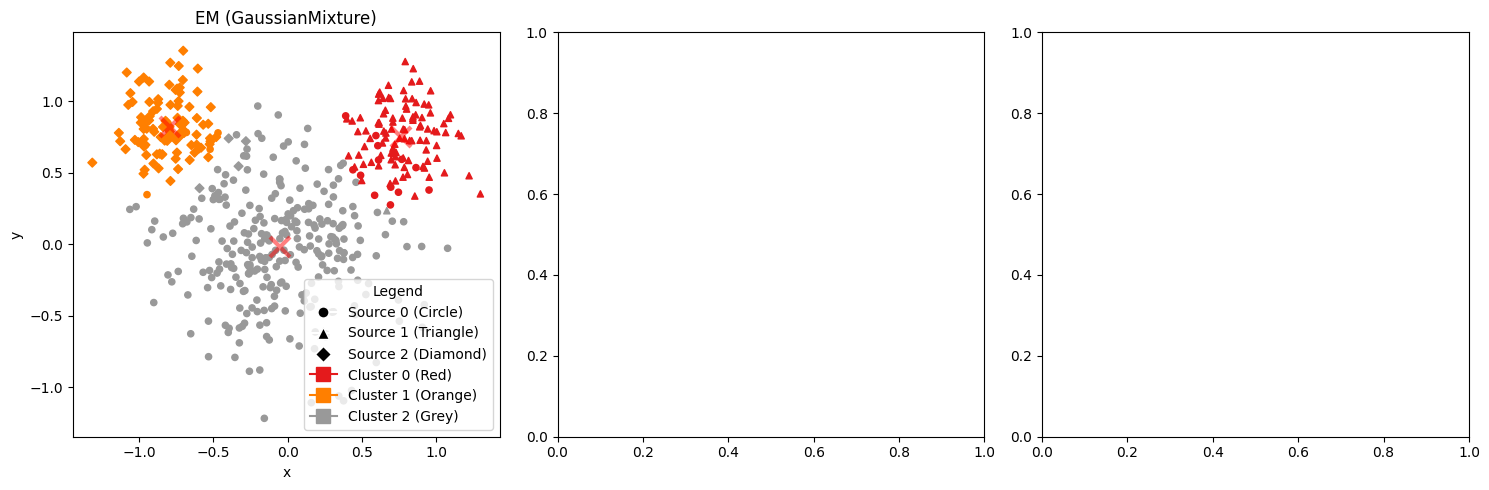

In [11]:
from sklearn.mixture import GaussianMixture
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D  # Import Line2D for custom legend

# ----------------------------------------------------------------------
# SECTION 1: Define a helper function to measure runtime
# ----------------------------------------------------------------------
def measure_runtime(model_class, X, n_runs=5, **kwargs):
    """
    Instantiates and fits `model_class(**kwargs)` on X `n_runs` times.
    Returns average runtime across those runs (in seconds).
    """

    for _ in range(n_runs):
        model = model_class(**kwargs)
        model.fit(X)

    return model

# ----------------------------------------------------------------------
# SECTION 2: Measure runtime for each algorithm + final fit for plotting
# ----------------------------------------------------------------------
n_runs = 5  # number of runs to average the runtime

# EM for Gaussian Mixtures
gm_model = measure_runtime(GaussianMixture, data_X, n_runs=n_runs, n_components=3, covariance_type='full', random_state=42)
gm_labels = gm_model.predict(data_X)




# ----------------------------------------------------------------------
# SECTION 3: Plot each clustering's results
# ----------------------------------------------------------------------

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
data_counts = [300, 100, 100]  # Number of points per source
markers = ['o', '^', 'D']  # Circle, Triangle, Diamond


# Define markers for each data source
markers = ['o', '^', 'D']  # Circle, Triangle, Diamond
data_counts = [300, 100, 100]
# Create a normalizer to scale cluster labels to colormap range
norm = Normalize(vmin=0, vmax=2)  # Normalize colors between 0 and 2

start = 0
# EM (GaussianMixture)
for original_group in range(3):
  end = start + data_counts[original_group]
  axes[0].scatter(data_X[start:end,0], data_X[start:end,1], c=gm_labels[start:end], marker=markers[original_group], cmap='Set1', s=20, norm=norm)
  start = end

axes[0].plot(gm_model.means_[:, 0], gm_model.means_[:, 1], 'rx', markersize=14, mew=3, alpha=0.5)
axes[0].set_title("EM (GaussianMixture)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")




legend_elements = [
    # Markers for original data sources
    Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=8, label='Source 0 (Circle)'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=8, label='Source 1 (Triangle)'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='k', markersize=8, label='Source 2 (Diamond)'),

    # Colors for inferred clusters
    Line2D([0], [0], marker='s', color=plt.cm.Set1(0.0), markersize=10, label='Cluster 0 (Red)'),
    Line2D([0], [0], marker='s', color=plt.cm.Set1(0.5), markersize=10, label='Cluster 1 (Orange)'),
    Line2D([0], [0], marker='s', color=plt.cm.Set1(1.0), markersize=10, label='Cluster 2 (Grey)')
]

# Add legend to the plot
axes[0].legend(handles=legend_elements, loc='best', frameon=True, title="Legend")

plt.tight_layout()
plt.show()

In [ ]:
def gaussian_pdf(x, mean, cov):
    """
    Compute multivariate Gaussian pdf value at x, given mean and cov.
    x is (d, ) vector, mean is (d, ), cov is (d, d).
    """
    d_ = len(x)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_const = 1.0 / np.sqrt((2*np.pi)**d_ * det_cov)
    diff = x - mean
    exponent = -0.5 * (diff @ inv_cov @ diff.T)
    return norm_const * np.exp(exponent)


    def e_step(data, pi, mu, Sigma):
    """
    E-step: compute the responsibilities resp[n, k] = p(z_n=k | x_n, theta).
    """
    N, _ = data.shape
    K = len(pi)
    resp = np.zeros((N, K))

    for n in range(N):
        for k in range(K):
            resp[n, k] = pi[k] * gaussian_pdf(data[n], mu[k], Sigma[k])
        resp[n, :] /= np.sum(resp[n, :])  # normalize

    return resp